# Identify a dataset

## Dataset Info

Name of dataset: Liver Disorders

Dataset link: https://doi.org/10.24432/C54G67

Dataset download: https://archive.ics.uci.edu/dataset/60/liver+disorders
* I encourage you to click "IMPORT IN PYTHON" which tells how to import the dataset

License: UC Irvine Machine Learning Repository is freely and openly available in public. There is no cost to access the data.

Size: liver+disorders is 11,625 bytes with 5 subfiles

## Characteristics of this dataset:

The BUPA liver disorders is created from BUPA Medical Research Ltd., donored by Richard S. Forsyth in 5/15/1990. The first 5 variables are blood features from the  blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption.  Each line in the bupa.data file constitutes the record of a single male individual. There are total 345 individuals having 345 rows, with 5 blood features and 1 alchol consumtion having 6 columns without missing values. 

In detail, the attribute information:
   1. mcv:	mean corpuscular volume
   2. alkphos:	alkaline phosphotase
   3. sgpt:	alamine aminotransferase
   4. sgot: 	aspartate aminotransferase
   5. gammagt:	gamma-glutamyl transpeptidase
   6. drinks:	number of half-pint equivalents of alcoholic beverages drunk per day

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import random
from functools import reduce
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Explore the dataset
* **Things that did not work**

Downloading the dataset was challenging. Initially, I tried to download the file. However, based on several approaches, I found a way to fetch and import the dataset using the code from the UC Irvine Repository. 

* **Things that work**

In [23]:
#reference: https://doi.org/10.24432/C54G67 
#terminal install required
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
feature = df.data.features 
target = df.data.targets 
  
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 

# Combine features and targets into a single DataFrame
df = pd.concat([feature, target], axis=1)

# Check for missing values in the entire DataFrame
if df.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values in the DataFrame.")

# Display the DataFrame
df

{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [24]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",df.shape[0])
print(f"Number of data points in the DataFrame: ", len(df.columns) * df.shape[0])

# Check for missing values in the entire DataFrame
if df.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values in the DataFrame.")

Number of columns:  6
Number of rows:  345
Number of data points in the DataFrame:  2070
No missing values in the DataFrame.


<Axes: ylabel='Frequency'>

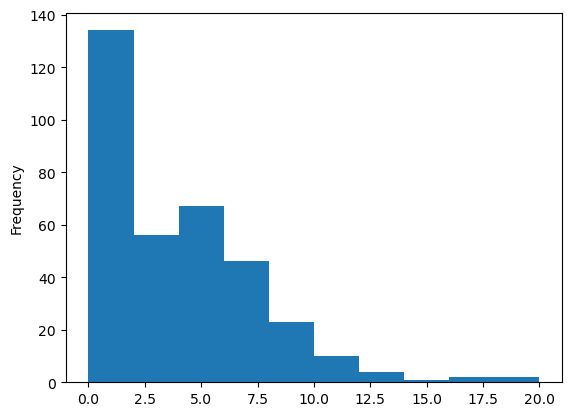

In [25]:
df.drinks.plot.hist()

The histogram of drinks column indicates that this dataset contains individuals who tend to drink less more than individuals who tend to drink more. From the histogram, I could interpret that the less individuals drink, the more records we have, and observation is not evenly distributed.

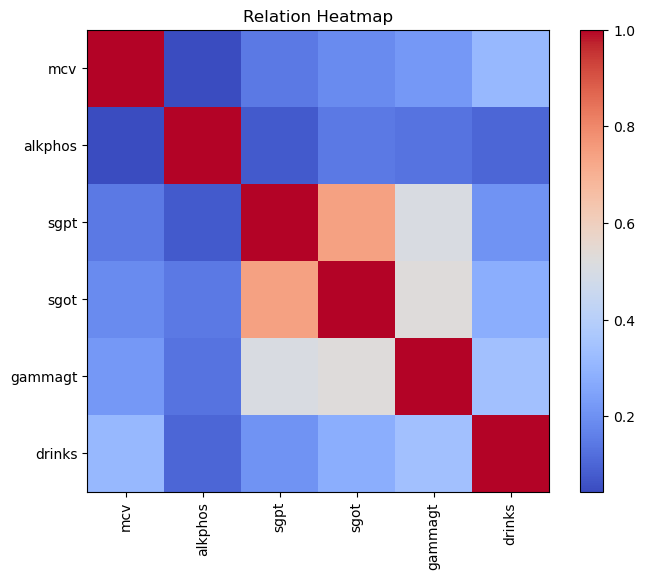

In [26]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Relation Heatmap')
plt.show()

The correlation heat map shows correlations by color difference. In this map, it has a higher correlation when it tends to have a red color, and a lower correlation when it tends to have a blue color.

From the heat map, I could see that most of the data have blue squares meaning the variables have very little relationship, especially lack of linear relationships with others. Although I can see that the sgot and sgpt showing pink squares which indicates a possible linear relationship.

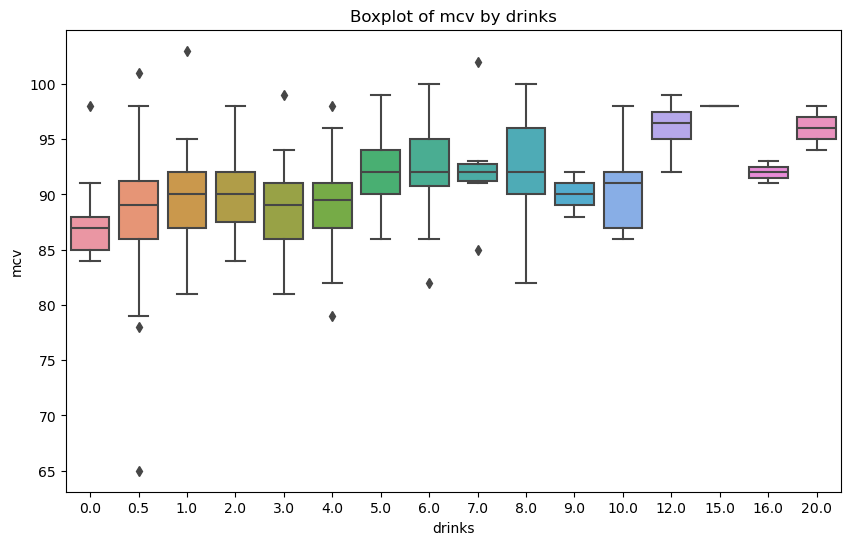

In [27]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='drinks', y='mcv', data=df)
plt.title('Boxplot of mcv by drinks')
plt.show()

The heat map shows general range of the mcv dataset by the number of the drinks. From the dataset above, we can see that as the number of the drinks increase, the mcv increase, meaning that volume of corpuscular tends to increase.